## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

The second case study (described below - 30 points) covers concepts taught in Part 2 (last 4 Computer Vision with CNN course).

 The case study is from an open source dataset from Kaggle. You are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal of the project is to create a classifier capable of determining a dog's breed from a photo

Link to the Kaggle project site:

https://www.kaggle.com/c/dog-breed-identification/data (Links to an external site.)Links to an external site.

Please find below the link to the dataset:

https://drive.google.com/drive/u/2/folders/1lFFmE4lxsIBhF18T9XswvAfKm9FF4pd6 (Links to an external site.)Links to an external site.

Video for creating train_data (Optional)

Watch this video if you face any issue in creating the training data

https://greatlearning.wistia.com/medias/8q0v2mqqor

The marks split up (30 points) is mentioned as part of the python notebook provided to you.

Project description - Dog_Breed_CNN-Project2.pdf

### Load Dataset Files

In [0]:
from google.colab import drive
from google.colab import files


In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/Project - CNN/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip','r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip','r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip','r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
import numpy as np
labels = pd.read_csv("labels.csv")

In [9]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [10]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe = OneHotEncoder()

In [0]:
label = np.array(labels['breed'])
label = label.reshape(len(label), 1)

In [0]:
labels_ohe = ohe.fit_transform(label).toarray()

In [14]:
labels_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
labels_ohe.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
num_channel = 1

In [17]:
from tqdm import tqdm
import cv2
x_feature = []
y_feature = []

for f, img in tqdm(labels.values):
   train_img = cv2.imread('./train/{}.jpg'.format(f),0)
   train_img_resize = cv2.resize(train_img, (img_rows,img_cols))
   x_feature.append(train_img_resize)
   y_feature.append(img)

100%|██████████| 10222/10222 [00:15<00:00, 673.19it/s]


In [0]:
import numpy as np
import pandas as pd

x_feature = np.array(x_feature)

In [19]:
x_feature.shape

(10222, 128, 128)

In [20]:
y_feature = np.array(y_feature)
y_feature.shape

(10222,)

In [21]:
y_feature[0]

'boston_bull'

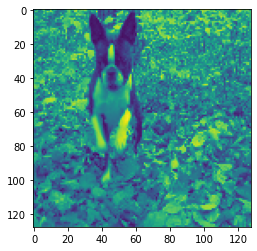

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_feature[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [23]:
x_feature[0]

array([[128,  99, 170, ..., 205, 189, 139],
       [ 86, 187, 168, ..., 156, 184, 176],
       [116, 111, 115, ..., 127, 148, 168],
       ...,
       [135, 134, 134, ..., 109, 105, 143],
       [132, 138, 138, ...,  83, 127, 180],
       [130, 139, 140, ...,  74,  78, 155]], dtype=uint8)

In [24]:
x_feature[0].shape

(128, 128)

In [0]:
x_feature_norm = []
for i in range(0, len(x_feature)):
    x_feature_norm.append(x_feature[i]/255)
    x_feature_norm[i] = x_feature_norm[i].reshape(img_rows,img_cols,1)

In [0]:
x_feature_norm = np.array(x_feature_norm, np.float32)

In [27]:
x_feature_norm.shape

(10222, 128, 128, 1)

In [28]:
x_feature_norm[0]

array([[[0.5019608 ],
        [0.3882353 ],
        [0.6666667 ],
        ...,
        [0.8039216 ],
        [0.7411765 ],
        [0.54509807]],

       [[0.3372549 ],
        [0.73333335],
        [0.65882355],
        ...,
        [0.6117647 ],
        [0.72156864],
        [0.6901961 ]],

       [[0.45490196],
        [0.43529412],
        [0.4509804 ],
        ...,
        [0.49803922],
        [0.5803922 ],
        [0.65882355]],

       ...,

       [[0.5294118 ],
        [0.5254902 ],
        [0.5254902 ],
        ...,
        [0.42745098],
        [0.4117647 ],
        [0.56078434]],

       [[0.5176471 ],
        [0.5411765 ],
        [0.5411765 ],
        ...,
        [0.3254902 ],
        [0.49803922],
        [0.7058824 ]],

       [[0.50980395],
        [0.54509807],
        [0.54901963],
        ...,
        [0.2901961 ],
        [0.30588236],
        [0.60784316]]], dtype=float32)

In [29]:
x_feature_norm[0].shape

(128, 128, 1)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

In [31]:
y_feature

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype='<U30')

In [32]:
len(y_feature)

10222

In [33]:
labels['breed']

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [34]:
len(labels_ohe)

10222

We can see here that labels_ohe is one hot encoding of y_train data.

In [0]:
X_train,X_val,y_train,y_val = train_test_split(x_feature_norm, y_feature, random_state = 1)

In [36]:
X_train.shape

(7666, 128, 128, 1)

In [37]:
y_train.shape

(7666,)

In [38]:
X_val.shape

(2556, 128, 128, 1)

In [39]:
y_val.shape

(2556,)

In [40]:
import numpy as np
len(np.unique(y_train))

120

In [41]:
len(np.unique(y_val))

120

In [0]:
le = LabelEncoder()

In [0]:
TrainY = le.fit_transform(y_train)

In [0]:
ValY=le.transform(y_val)

In [45]:
TrainY.shape

(7666,)

In [46]:
ValY.shape

(2556,)

In [0]:
TrainY = TrainY.reshape(len(TrainY), 1)

In [48]:
TrainY.shape

(7666, 1)

In [0]:
ValY = ValY.reshape(len(ValY), 1)

In [50]:
ValY.shape

(2556, 1)

In [0]:
Ytrain = ohe.fit_transform(TrainY)
Yval = ohe.transform(ValY)

In [52]:
Ytrain.shape

(7666, 120)

In [53]:
Yval.shape

(2556, 120)

In [0]:
Yval =Yval.toarray()

In [0]:
Ytrain= Ytrain.toarray()

In [0]:
#np.save("X_train", X_train)

In [0]:
#np.save("X_val", X_val)

In [0]:
#np.save("Ytrain", Ytrain)

In [0]:
#np.save("Yval", Yval)

In [0]:
#files.download("Yval.npy")

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
samples = pd.read_csv("sample_submission.csv")

In [63]:
samples.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [64]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Columns: 121 entries, id to yorkshire_terrier
dtypes: float64(120), object(1)
memory usage: 9.6+ MB


In [0]:
test_img = samples['id']

In [66]:
test_img.values

array(['000621fb3cbb32d8935728e48679680e',
       '00102ee9d8eb90812350685311fe5890',
       '0012a730dfa437f5f3613fb75efcd4ce', ...,
       'fff74b59b758bbbf13a5793182a9bbe4',
       'fff7d50d848e8014ac1e9172dc6762a3',
       'fffbff22c1f51e3dc80c4bf04089545b'], dtype=object)

Run the below code to load the test image files in x_test_feature

In [67]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:15<00:00, 681.97it/s]


In [68]:
x_test_feature = np.array(x_test_feature)
x_test_feature.shape

(10357, 128, 128)

Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature_norm = []
for i in range(0, len(x_test_feature)):
    x_test_feature_norm.append(x_test_feature[i]/255)
    x_test_feature_norm[i] = x_test_feature_norm[i].reshape(img_rows,img_cols,1)

In [0]:
x_test_feature_norm = np.array(x_test_feature_norm, np.float32)

In [71]:
x_test_feature_norm.shape

(10357, 128, 128, 1)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.layers import Reshape,Conv2D, Conv3D
from tensorflow.keras import Model

In [0]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Conv2D, Conv3D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Dropout, MaxPool2D, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
clear_session()
model = Sequential()
model.add(BatchNormalization(input_shape=(128,128,1)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(120,activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 122, 122, 32)      128       
_________________________________________________________________
flatten (Flatten)            (None, 476288)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

### Use batch_size = 128 and epochs = 10 and execute the model

In [76]:
model.fit(X_train, Ytrain,
                    epochs=10,
                    batch_size= 128,
           validation_data=(X_val,Yval)
                   )

Epoch 1/10
60/60 [==============================] - 7s 109ms/step - loss: 4.8832 - accuracy: 0.0245 - val_loss: 4.9779 - val_accuracy: 0.0246
Epoch 2/10
60/60 [==============================] - 6s 98ms/step - loss: 3.6464 - accuracy: 0.2032 - val_loss: 5.2140 - val_accuracy: 0.0102
Epoch 3/10
60/60 [==============================] - 6s 98ms/step - loss: 0.7811 - accuracy: 0.9119 - val_loss: 6.0809 - val_accuracy: 0.0117
Epoch 4/10
60/60 [==============================] - 6s 98ms/step - loss: 0.0419 - accuracy: 0.9993 - val_loss: 6.6668 - val_accuracy: 0.0078
Epoch 5/10
60/60 [==============================] - 6s 98ms/step - loss: 0.0143 - accuracy: 0.9993 - val_loss: 7.0490 - val_accuracy: 0.0172
Epoch 6/10
60/60 [==============================] - 6s 98ms/step - loss: 0.0097 - accuracy: 0.9993 - val_loss: 6.9283 - val_accuracy: 0.0196
Epoch 7/10
60/60 [==============================] - 6s 98ms/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 6.4154 - val_accuracy: 0.0227
Epoch 8/10
6

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from tensorflow.keras.layers import ZeroPadding2D

train_datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

In [78]:
clear_session()
model = Sequential()
model.add(BatchNormalization(input_shape=(128,128,1)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(120,activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 122, 122, 32)      128       
_________________________________________________________________
flatten (Flatten)            (None, 476288)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator=train_datagen.flow(X_train,y=Ytrain,batch_size=32)
val_generator=test_datagen.flow(X_val,y=Yval,batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [80]:
history=model.fit_generator(train_generator,
                      steps_per_epoch = 500,
                      validation_data = val_generator,
                      validation_steps = 4,
                      epochs = 10,
                      verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
500/500 [==============================] - 27s 54ms/step - loss: 4.8490 - accuracy: 0.0201 - val_loss: 5.0362 - val_accuracy: 0.0312
Epoch 2/10
500/500 [==============================] - 27s 54ms/step - loss: 4.6462 - accuracy: 0.0322 - val_loss: 4.6645 - val_accuracy: 0.0391
Epoch 3/10
500/500 [==============================] - 27s 54ms/step - loss: 4.5498 - accuracy: 0.0371 - val_loss: 4.5887 - val_accuracy: 0.0469
Epoch 4/10
500/500 [==============================] - 27s 54ms/step - loss: 4.4716 - accuracy: 0.0418 - val_loss: 4.5903 - val_accuracy: 0.0547
Epoch 5/10
500/500 [==============================] - 27s 54ms/step - loss: 4.4044 - accuracy: 0.0499 - val_loss: 4.5346 - val_accuracy: 0.0547
Epoch 6/10
500/500 [==============================] - 27s 54ms/step - loss: 4.3510 - accuracy: 0.0565 - val_loss: 4.4369 - val_accuracy: 0.0703
Epoch 7/10
500/500 [==============================] - 27s 54

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
path = "/content/drive/My Drive/Colab Notebooks/Project - CNN/"

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg', input_shape = (img_rows, img_cols,3))

Print the summary of the base_model

In [82]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
#get Output layer of Pre0trained model
x = base_model.output

#Global average pool to reduce number of features and Flatten the output
x = Flatten()(x)

#Add output layer
x = tf.keras.layers.Dense(1024,input_shape=(512,),activation='relu')(x)
x = tf.keras.layers.Dense(256,input_shape=(512,), activation='relu')(x)
prediction = tf.keras.layers.Dense(120,activation='softmax')(x)



### Make all the layers in the base_model (VGG16) to be non-trainable

In [87]:
np.size(base_model.layers)

20

In [0]:
#Set pre-trained model layers to not trainable
for layer in base_model.layers:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
from tensorflow.keras.layers import Activation
model_vgg = Sequential([
    Dense(1024, input_shape=(512,)),
    Activation('relu'),
    Dense(256, input_shape=(512,)),
    Activation('relu'),
    Dense(120),
    Activation('softmax'),
])

model_vgg.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [128]:
#Getting Image embedding from the pre-trained model and use that as input to present model

from keras.preprocessing import image

X_arr = []

for id, label in tqdm(labels.values):
    X_arr.append(base_model.predict(preprocess_input(np.expand_dims(img_to_array(image.load_img('./train/'+id+'.jpg', target_size=[128,128])), axis=0)))[0])



100%|██████████| 10222/10222 [06:27<00:00, 26.37it/s]


In [0]:
X_train_vgg = pd.DataFrame(X_arr)

In [135]:
X_train_vgg.shape

(10222, 512)

In [0]:
y_train_vgg = labels_ohe

In [118]:
y_train_vgg.shape

(10222, 120)

In [133]:
model_vgg.fit(X_train_vgg, y_train_vgg, epochs=10, batch_size=128)

Epoch 1/10
80/80 [==============================] - 0s 3ms/step - loss: 4.5398 - accuracy: 0.0334
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 4.5405 - accuracy: 0.0303
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 4.5320 - accuracy: 0.0336
Epoch 4/10
80/80 [==============================] - 0s 3ms/step - loss: 4.5248 - accuracy: 0.0340
Epoch 5/10
80/80 [==============================] - 0s 3ms/step - loss: 4.5291 - accuracy: 0.0336
Epoch 6/10
80/80 [==============================] - 0s 3ms/step - loss: 4.5274 - accuracy: 0.0334
Epoch 7/10
80/80 [==============================] - 0s 3ms/step - loss: 4.5213 - accuracy: 0.0337
Epoch 8/10
80/80 [==============================] - 0s 3ms/step - loss: 4.5231 - accuracy: 0.0331
Epoch 9/10
80/80 [==============================] - 0s 3ms/step - loss: 4.5213 - accuracy: 0.0342
Epoch 10/10
80/80 [==============================] - 0s 3ms/step - loss: 4.5166 - accuracy: 0.0347


In [0]:
#Unfreezing all layers after layer# 10
for layer in base_model.layers[10:]:
    layer.trainable = True 

In [0]:
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [137]:
X_arr = []

for id, label in tqdm(labels.values):
    X_arr.append(base_model.predict(preprocess_input(np.expand_dims(img_to_array(image.load_img('./train/'+id+'.jpg', target_size=[128,128])), axis=0)))[0])
X_train_vgg = pd.DataFrame(X_arr)


100%|██████████| 10222/10222 [06:22<00:00, 26.71it/s]


In [151]:
model_vgg.fit(X_train_vgg, y_train_vgg, epochs=1000, batch_size=128)

Epoch 1/1000
80/80 [==============================] - 0s 3ms/step - loss: 1.9323 - accuracy: 0.5748
Epoch 2/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.9734 - accuracy: 0.7308
Epoch 3/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.8487
Epoch 4/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.8743
Epoch 5/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.8744
Epoch 6/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.8745
Epoch 7/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.8739
Epoch 8/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.4479 - accuracy: 0.8830
Epoch 9/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.4639 - accuracy: 0.8779
Epoch 10/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.8741